<a href="https://colab.research.google.com/github/Beard31/Deep-Dive-Data-Science-Projects/blob/main/NLP_Description_for_Students_Beard_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing



By Tyre' Beard DDDS Corhort 17


3/25

This project will give you practical experience using Natural Language Processing techniques. This project is in three parts:
- in part 1) you will use a dataset in a CSV file
- in part 2) you will use the Wikipedia API to directly access content
on Wikipedia.
- in part 3) you will make your notebook interactive


- NLP enables computers to understand and interpret and generate human language.
- Segmentation: Breaking down the text into individual sentences. We do so by segmenting along the documents punctuation.
- Tokenization: Breaking the sentences down into individual words, each word will be explained to our algorithm
- Stop Words: removal of words that are not essential, Ex. of, and, to, it
- Stemming:normalizing word into their base or root form. Taking away prefixes and suffixes  


- Data Science Problem
  - Unsupervised Clustering

### Part 1)



- The CSV file is available at https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv
- The file contains a list of famous people and a brief overview.
- The goal of part 1) is to ...
  1. Pick one person from the list ( the target person ) and output 10 other people who's overview are "closest" to the target person in a Natural Language Processing sense
  1. Also output the sentiment of the overview of the target person



In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import nltk
# nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
import nltk
from textblob import TextBlob
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [147]:
%%capture
# Install textblob
!pip install -U textblob

In [148]:
!curl -s https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv | wc -l


42786


In [149]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv'


In [150]:
df = pd.read_csv(url)
df.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [151]:
df.shape

(42786, 3)

1. Pick one person from the list ( the target person ) and output 10 other people who's overview are "closest" to the target person in a Natural Language Processing sense

In [152]:
target_person_index = 5  # this will change the person
target_person_name = df.loc[target_person_index, 'name'] # extracts the name
target_person_text = df.loc[target_person_index, 'text'] # extracts text

In [153]:
# computes sentiment of the target person's overview
target_sentiment = TextBlob(target_person_text).sentiment.polarity

- Term Frequency-Inverse Document Frequemcy- to convert text into a numerical matrix for machine learning text analysis

In [154]:
# vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english') # Removes common English stopwords ex. like, the, is...
tfidf_matrix = vectorizer.fit_transform(df['text']) # Converts text column into a TF-IDF sparce representation

In [155]:
tfidf_matrix.shape

(42786, 437190)

- Here we are training and fitting the matrix. We apply the K-NN algorithm
- cosine measures the distance between data points, captures similarity

In [156]:
# k-Nearest Neighbors algorithm to find the 10 closest people
knn = NearestNeighbors(n_neighbors=11, metric='cosine')  # the number plus one; the target person is included
knn.fit(tfidf_matrix)

NearestNeighbors(metric='cosine', n_neighbors=11)

In [157]:
# index of the target person
target_index = df[df['name'] == target_person_name].index[0]

- distances: is an array containing the distances between the target person and their nearest neighbors
- indices: is an array containing row numbers of these neighbors in the matrix

In [158]:
# closest people
distances, indices = knn.kneighbors(tfidf_matrix[target_index])

In [159]:
# 10 closest people excluding the target person itself
# indices[0] gets indices of the 10 similar people from k-NN
# df.iloc[i]['name'] gets the name of each similar person
# last part after if excludes target person
similar_people_names = [df.iloc[i]['name'] for i in indices[0] if i != target_index]

2. Also output the sentiment of the overview of the target person

- Understanding Sentiment: 1=strong positive 0=neutral -1=strong negative

In [160]:
# target person's sentiment and similar people
print(f"Target Person: {target_person_name}")
print(f"Sentiment Score of Overview: {target_sentiment}\n")
print("Top 10 Most Similar People:")
for i, person in enumerate(similar_people_names, 1):
    print(f"{i}. {person}")

Target Person: Sam Henderson
Sentiment Score of Overview: 0.13778102453102453

Top 10 Most Similar People:
1. Jonathan Lemon
2. Mike Curtis (writer)
3. Tim Fish
4. Bill Schelly
5. Fred Fredericks
6. Dillon Naylor
7. Steve Purcell
8. John K. Snyder III
9. Peter Richardson (English director)
10. Rolf Gohs


### Part 2)



- For the same target person that you chose in Part 1), use the Wikipedia API to access the whole content of the target person's Wikipedia page.
- The goal of Part 2) is to ...
  1. Print out the text of the Wikipedia article for the target person
  1. Determine the sentiment of the text of the Wikipedia page for the target person
  1. Collect the text of the Wikipedia pages from the 10 nearest neighbors from Part 1)
  1. Determine the nearness ranking of these 10 people to your target person based on their entire Wikipedia page
  1. Compare, i.e. plot,  the nearest ranking from Step 1) with the Wikipedia page nearness ranking.  A difference of the rank is one means of comparison.



Install Wikipedia API

In [161]:
%%capture
!pip3 install wikipedia-api

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import nltk
from nltk.stem import PorterStemmer
import wikipediaapi

In [163]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

Pull out page from Wikipedia

In [164]:
wikip = wikipediaapi.Wikipedia('user_agent')
# Get Wikipedia page for target person
topic = target_person_name
page_ex = wikip.page(topic) # stores the page content
wiki_text = page_ex.text # extracts the actual  text content of the Wikipedia page

1. Print out the text of the Wikipedia article for the target person

In [165]:
wiki_text

'Sam Henderson (born October 18, 1969) is an American cartoonist, writer, and expert on American comedy history. He is best known for his ongoing comic book series Magic Whistle. He was a contributor to the animated television series SpongeBob SquarePants and Camp Lazlo. Henderson has contributed work to Duplex Planet Illustrated, Zero Zero, 9-11: Artists Respond, Volume One, Mega-Pyton, Maakies, Nib-Lit, Legal Action Comics, and the animated shorts compilation God Hates Cartoons. He has also been a past participant in Robert Sikoryak\'s Carousel multimedia slideshow series.\n\nBiography\nHenderson was born in Woodstock, New York. He attended Boiceville, New York\'s Onteora High School, graduating in 1987, and the School of Visual Arts in New York City, where he graduated in 1991.\nHenderson has been self-publishing xeroxed  minicomics since 1980. In the mid-to-late 1980s he drew and published a comic called Captain Spaz with his friend Bobby Weiss. The series ended in 1988 as he was b

Replace newline chars with spaces before doing any processing. Strip the "s" from possessives

In [166]:
wiki_text_clean = (
  wiki_text
  .lower()
  .replace("\n"," ")
  .replace("\'s",'')
  .replace('\'','')
  .replace("(", "")
  .replace(")", "")
  .replace('"', "")
)
wiki_text_clean

'sam henderson born october 18, 1969 is an american cartoonist, writer, and expert on american comedy history. he is best known for his ongoing comic book series magic whistle. he was a contributor to the animated television series spongebob squarepants and camp lazlo. henderson has contributed work to duplex planet illustrated, zero zero, 9-11: artists respond, volume one, mega-pyton, maakies, nib-lit, legal action comics, and the animated shorts compilation god hates cartoons. he has also been a past participant in robert sikoryak carousel multimedia slideshow series.  biography henderson was born in woodstock, new york. he attended boiceville, new york onteora high school, graduating in 1987, and the school of visual arts in new york city, where he graduated in 1991. henderson has been self-publishing xeroxed  minicomics since 1980. in the mid-to-late 1980s he drew and published a comic called captain spaz with his friend bobby weiss. the series ended in 1988 as he was busy in colle

Convert to textblob

In [167]:
wiki_blob = TextBlob(wiki_text_clean)

Only look at the first 10 sentences

In [168]:
my_sentences = wiki_blob.sentences[0:10]
my_sentences

[Sentence("sam henderson born october 18, 1969 is an american cartoonist, writer, and expert on american comedy history."),
 Sentence("he is best known for his ongoing comic book series magic whistle."),
 Sentence("he was a contributor to the animated television series spongebob squarepants and camp lazlo."),
 Sentence("henderson has contributed work to duplex planet illustrated, zero zero, 9-11: artists respond, volume one, mega-pyton, maakies, nib-lit, legal action comics, and the animated shorts compilation god hates cartoons."),
 Sentence("he has also been a past participant in robert sikoryak carousel multimedia slideshow series."),
 Sentence("biography henderson was born in woodstock, new york."),
 Sentence("he attended boiceville, new york onteora high school, graduating in 1987, and the school of visual arts in new york city, where he graduated in 1991. henderson has been self-publishing xeroxed  minicomics since 1980. in the mid-to-late 1980s he drew and published a comic call

In [169]:
len(wiki_blob.sentences)

24

Singularize and convert back to string

- remove common plural suffixes like "s" or "es

In [170]:
for i, sentence in enumerate(my_sentences):
  sing = [x.singularize() for x in sentence.words]
  my_sentences[i] = ' '.join(sing)
my_sentences

['sam henderson born october 18 1969 is an american cartoonist writer and expert on american comedy history',
 'he is best known for hi ongoing comic book series magic whistle',
 'he wa a contributor to the animated television series spongebob squarepant and camp lazlo',
 'henderson ha contributed work to duplex planet illustrated zero zero 9-11 artist respond volume one mega-pyton maaky nib-lit legal action comic and the animated short compilation god hate cartoon',
 'he ha also been a past participant in robert sikoryak carousel multimedium slideshow series',
 'biography henderson wa born in woodstock new york',
 'he attended boiceville new york onteora high school graduating in 1987 and the school of visual art in new york city where he graduated in 1991 henderson ha been self-publishing xeroxed minicomic since 1980 in the mid-to-late 1980 he drew and published a comic called captain spaz with hi friend bobby weis',
 'the series ended in 1988 a he wa busy in college',
 'in college h

Lemmatization is a technique that transforms words to their base forms ex. running to run or runner to runner. Lematization techique keeps the word meaning

In [171]:
# Lemmatization
from textblob import Word
nltk.download('wordnet')

for i, sentence in enumerate(my_sentences):
    lemmatized_words = [Word(word).lemmatize() for word in sentence.split()]
    my_sentences[i] = ' '.join(lemmatized_words)
my_sentences


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['sam henderson born october 18 1969 is an american cartoonist writer and expert on american comedy history',
 'he is best known for hi ongoing comic book series magic whistle',
 'he wa a contributor to the animated television series spongebob squarepant and camp lazlo',
 'henderson ha contributed work to duplex planet illustrated zero zero 9-11 artist respond volume one mega-pyton maaky nib-lit legal action comic and the animated short compilation god hate cartoon',
 'he ha also been a past participant in robert sikoryak carousel multimedium slideshow series',
 'biography henderson wa born in woodstock new york',
 'he attended boiceville new york onteora high school graduating in 1987 and the school of visual art in new york city where he graduated in 1991 henderson ha been self-publishing xeroxed minicomic since 1980 in the mid-to-late 1980 he drew and published a comic called captain spaz with hi friend bobby wei',
 'the series ended in 1988 a he wa busy in college',
 'in college he

TF-IDF

In [172]:
tf_idf_matrix = TfidfVectorizer(stop_words = 'english')# Removes common English stopwords ex. like, the, is...
tf_idf = tf_idf_matrix.fit_transform(my_sentences) # Converts text column into a TF-IDF sparce representation

In [173]:
tf_idf.shape

(10, 102)

In [174]:
pd.set_option('display.max_rows', 200)

results_df = pd.DataFrame(
  data = tf_idf.toarray(),
  columns = tf_idf_matrix.get_feature_names_out()
)
results_df.transpose()

,0,1,2,3,4,5,6,7,8,9
11,0.000000,0.000000,0.000000,0.191917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,0.265748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1969,0.265748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318727,0.000000,0.000000,0.000000
1987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159363,0.000000,0.000000,0.000000
1988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.464819,0.000000,0.000000
1991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159363,0.000000,0.000000,0.000000
1993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318152
action,0.000000,0.000000,0.000000,0.191917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
alternative,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318152


K Nearest Neighbors

In [175]:
# Fit nearest neighbors
nn = NearestNeighbors().fit(tf_idf) # fitting NN model on the TF-IDF matrix for similarity test

Get nearest neighbors distance to first sentance

In [176]:
distances, indices = nn.kneighbors(
  X = tf_idf[0],
  n_neighbors = 10,
)

4. Determine the nearness ranking of these 10 people to your target person based on their entire Wikipedia page

Displays the distances of the 10 most similar sentences on the TF-IDF matrix

In [177]:
distances

array([[0.        , 1.31475075, 1.39835684, 1.40105914, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]])

In [178]:
indices

array([[0, 5, 3, 6, 1, 2, 4, 7, 9, 8]])

In [179]:
# indices of the nearest neighbors
print("Indices of Nearest Neighbors:")
print(indices)

# names corresponding to the indices
print("\nNames of Nearest Neighbors:")
for i in indices[0]:
    print(df.iloc[i]['name'])


Indices of Nearest Neighbors:
[[0 5 3 6 1 2 4 7 9 8]]

Names of Nearest Neighbors:
Digby Morrell
Sam Henderson
Franz Rottensteiner
Aaron LaCrate
Alfred J. Lewy
Harpdog Brown
G-Enka
Trevor Ferguson
Cathy Caruth
Grant Nelson


 Display Similar Sentences with Similarity Scores

In [180]:
np.array([ str(x) for x in wiki_blob.sentences[0:10] ] )[indices]

array([['sam henderson born october 18, 1969 is an american cartoonist, writer, and expert on american comedy history.',
        'biography henderson was born in woodstock, new york.',
        'henderson has contributed work to duplex planet illustrated, zero zero, 9-11: artists respond, volume one, mega-pyton, maakies, nib-lit, legal action comics, and the animated shorts compilation god hates cartoons.',
        'he attended boiceville, new york onteora high school, graduating in 1987, and the school of visual arts in new york city, where he graduated in 1991. henderson has been self-publishing xeroxed  minicomics since 1980. in the mid-to-late 1980s he drew and published a comic called captain spaz with his friend bobby weiss.',
        'he is best known for his ongoing comic book series magic whistle.',
        'he was a contributor to the animated television series spongebob squarepants and camp lazlo.',
        'he has also been a past participant in robert sikoryak carousel mult

2. Determine the sentiment of the text of the Wikipedia page for the target person

In [181]:
if not wiki_text: # Handle cases where the page might not be found
    print(f"Wikipedia page not found for {target_person_name}")
else:
    print(f"Wikipedia Text for {target_person_name}:\n{wiki_text[:500]}...") # Print first 500 characters for brevity

    # Determine sentiment of the Wikipedia page
    target_wiki_sentiment = TextBlob(wiki_text).sentiment.polarity
    print(f"2. Sentiment Score of Wikipedia Page: {target_wiki_sentiment}\n")

Wikipedia Text for Sam Henderson:
Sam Henderson (born October 18, 1969) is an American cartoonist, writer, and expert on American comedy history. He is best known for his ongoing comic book series Magic Whistle. He was a contributor to the animated television series SpongeBob SquarePants and Camp Lazlo. Henderson has contributed work to Duplex Planet Illustrated, Zero Zero, 9-11: Artists Respond, Volume One, Mega-Pyton, Maakies, Nib-Lit, Legal Action Comics, and the animated shorts compilation God Hates Cartoons. He has also bee...
2. Sentiment Score of Wikipedia Page: 0.11278360528360519



3. Collect the text of the Wikipedia pages from the 10 nearest neighbors from Part 1)

In [182]:
# Wikipedia text for the 10 nearest neighbors
for i, person in enumerate(similar_people_names, 1):
  try:
      page_neighbor = wikip.page(person)
      neighbor_wiki_text = page_neighbor.text

      if neighbor_wiki_text: # Handle cases where a neighbor's page might not exist
          print(f"Wikipedia Text for {person}: \n{neighbor_wiki_text[:200]}...") # Example, print a snippet
          # ... Process the neighbor's wikipedia page content ...
      else:
          print(f"Wikipedia page not found for {person}")

  except Exception as e:
      print(f"Error fetching Wikipedia page for {person}: {e}")

Wikipedia Text for Jonathan Lemon: 
Jonathan Lemon is a British and American cartoonist and former musician. He is best known for drawing the Alley Oop comic strip.
Lemon was born in Watford, Hertfordshire, England in 1965, and earned a...
Wikipedia Text for Mike Curtis (writer): 
Mike Curtis (born 1953) is an American writer who scripts the Dick Tracy comic strip, with Joe Staton as artist. He has been working professionally in comic books as a writer since the mid-1980s. He h...
Wikipedia Text for Tim Fish: 
Tim Fish (a pen name; born 1970) is a comic book author and artist and playwright, known for the comics Cavalcade of Boys and its spin-off graphic novels, short stories for various anthologies and the...
Wikipedia Text for Bill Schelly: 
William Carl Schelly  (November 2, 1951 – September 12, 2019) was an Eisner Award-winning author who chronicled the history of comic books and comic book fandom, and wrote biographies of comic book cr...
Wikipedia Text for Fred Fredericks: 
Harol

5. Compare, i.e. plot, the nearest ranking from Step 1) with the Wikipedia page nearness ranking. A difference of the rank is one means of comparison.

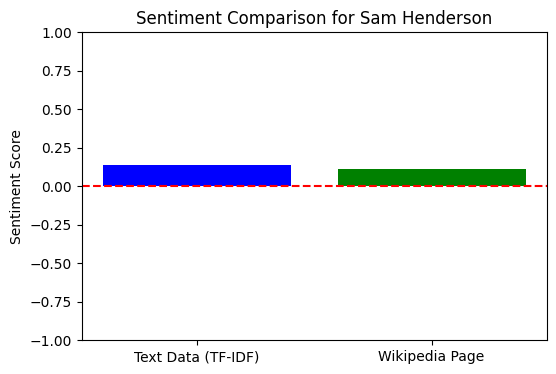

In [183]:
import matplotlib.pyplot as plt

# Sentiment sources and values
sentiment_sources = ["Text Data (TF-IDF)", "Wikipedia Page"]
sentiment_values = [target_sentiment, target_wiki_sentiment]

# Plot sentiment comparison
plt.figure(figsize=(6, 4))
plt.bar(sentiment_sources, sentiment_values, color=['blue', 'green'])
plt.ylim(-1, 1)  # Sentiment polarity ranges from -1 to 1
plt.ylabel("Sentiment Score")
plt.title(f"Sentiment Comparison for {target_person_name}")
plt.axhline(0, color='red', linestyle='--')  # Neutral sentiment line

# Show the plot
plt.show()

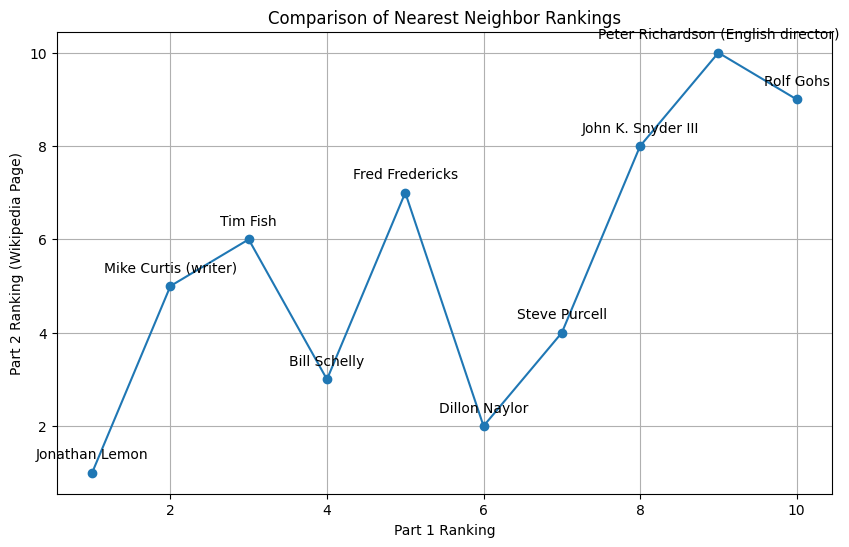

,Part 1 Ranking,Person,Part 2 Ranking,Rank Difference
0,1,Jonathan Lemon,1,0
1,2,Mike Curtis (writer),5,-3
2,3,Tim Fish,6,-3
3,4,Bill Schelly,3,1
4,5,Fred Fredericks,7,-2
5,6,Dillon Naylor,2,4
6,7,Steve Purcell,4,3
7,8,John K. Snyder III,8,0
8,9,Peter Richardson (English director),10,-1
9,10,Rolf Gohs,9,1


In [184]:

comparison_df = pd.DataFrame({
    'Part 1 Ranking': range(1, 11),  # ranks from Part 1
    'Person': similar_people_names  # names from Part 1
})

# part 2 ranking based on indices
comparison_df['Part 2 Ranking'] = [list(indices[0]).index(i) +1 if i in indices[0] else -1 for i in comparison_df.index]

# calculate the difference in ranks
comparison_df['Rank Difference'] = comparison_df['Part 1 Ranking'] - comparison_df['Part 2 Ranking']

plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Part 1 Ranking'], comparison_df['Part 2 Ranking'], marker='o', linestyle='-')

for i, row in comparison_df.iterrows():
    plt.annotate(row['Person'], (row['Part 1 Ranking'], row['Part 2 Ranking']), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel("Part 1 Ranking")
plt.ylabel("Part 2 Ranking (Wikipedia Page)")
plt.title("Comparison of Nearest Neighbor Rankings")
plt.grid(True)
plt.show()

# Display the comparison DataFrame
comparison_df


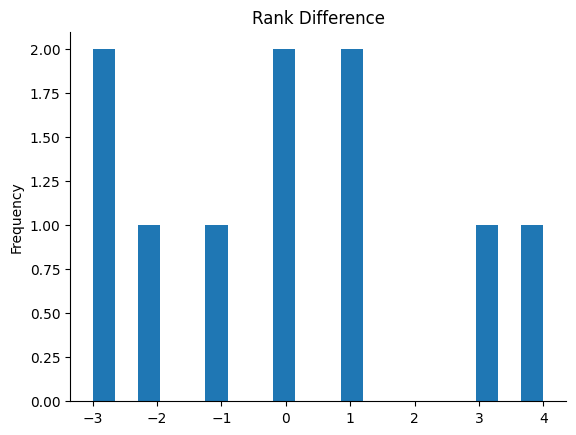

In [194]:
# @title Rank Difference

from matplotlib import pyplot as plt
comparison_df['Rank Difference'].plot(kind='hist', bins=20, title='Rank Difference')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Part 3)


Make an interactive notebook where a user can choose or enter a name and the notebook displays the 10 closest individuals.

In addition to presenting the project slides, at the end of the presentation each student will demonstrate their code using a famous person suggested by the other students that exists in the DBpedia set.


In [185]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from textblob import TextBlob
import ipywidgets as widgets
from IPython.display import display, clear_output

In [186]:
!curl -s https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv | wc -l

42786


In [192]:
def find_similar_people(name):
    try:
        target_index = df[df['name'] == name].index[0] # target person
        distances, indices = knn.kneighbors(tfidf_matrix[target_index]) # Finds the Nearest Neighbors based on TF-IDF matrix distance
        similar_people_names = [df.iloc[i]['name'] for i in indices[0] if i != target_index] # extracts names of similar people excluding target person

        target_person_text = df.loc[df['name'] == name, 'text'].iloc[0] # retrives the text
        target_sentiment = TextBlob(target_person_text).sentiment.polarity # Calculates polarity

        print(f"Target Person: {name}")
        print(f"Sentiment Score of Overview: {target_sentiment}\n")
        print("Top 10 Most Similar People:")
        for i, person in enumerate(similar_people_names, 1):
            print(f"{i}. {person}")

    except IndexError:
        print(f"Person '{name}' not found in the dataset.")

In [188]:
# interactive widgets
name_input = widgets.Text(description="Enter Name:")
find_button = widgets.Button(description="Find Similar People")

In [189]:
# output widget to display results
output = widgets.Output()

In [190]:
# callback function for the button click
def on_button_clicked(b):
    with output:
        clear_output()
        find_similar_people(name_input.value)

In [196]:
# links button to callback function
find_button.on_click(on_button_clicked)

# displays the widgets
display(name_input, find_button, output)

Target Person: Tom Chiu
Sentiment Score of Overview: 0.22954545454545452

Top 10 Most Similar People:
1. Hong-Yee Chiu
2. David Campbell (British musician)
3. Judy Dunaway
4. Joseph Twist
5. Robert Mann
6. James Willey
7. Mark Feldman
8. Chiu Chi-ling
9. Greg Cohen
10. Ralph Evans (violinist)


## Conclusion
- NLP is a powerful tool that helps computers understand human language.
- Today we used K Nearest Neighbors on the TF-IDF matrix to find similar people based on their text and compared them.
- improvements: make a plot of that shows the Nearest Neighbors rankings before and after
 - Try only using Lemmatization without Singularizing